In [1]:
import numpy as np

Y = np.genfromtxt('test_data.txt')[:,1]

In [4]:
print(Y.shape)

(340,)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

In [2]:
data_1 = pd.read_csv("icart_and_human_corridor_5.csv",header = None,index_col=None)

#for robot
x1 = data_1.iloc[:, 0].to_numpy()
y1 = data_1.iloc[:, 1].to_numpy()

training_X = np.vstack((x1,y1)).T

In [10]:
print(x1.shape)
print(y1.shape)
print(training_X[678].reshape(-1,1).shape)

(5087,)
(5087,)
(2, 1)


In [11]:
A = np.identity(2)
A

array([[1., 0.],
       [0., 1.]])

In [ ]:
for z in training_X:
    print(z.reshape(-1,1))

In [31]:
def legend_without_duplicate_labels(figure):
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    figure.legend(by_label.values(), by_label.keys(), loc='lower right')

In [18]:
class KalmanFilter():

    # def __init__(self, arguments):
    #     # define or assign object attributes
        
    # def other_methods(self, arguments):
    #     # body of the method
    
    # INPUT
    # A, B : state space matrices (nxn nxm)
    # C : measurement matrix (pxn)
    # R : cov matrix for state noise (nxn)
    # Q : cov matrix for measurement noise (pxp)
    # S0 : Initial cov matrix for state (nxn)
    # x0 : Initial state 

    # OUTPUT
    # S, x : new state and new cov matrix for state (nxn and n)
    def __init__(self,A = None, B = None,C = None, Q =None, R = None, S =None, x0 = None,u =None):
        
        if(A is None or C is None):
            raise ValueError("System dynamics should be set.")
        

        # attributes
        self.A = A
        self.C = C
        self.B = B

        # shapes
        self.n = A.shape[0]
        self.p = C.shape[0]
        self.m = B.shape[1]
    
        self.Q = np.eye(self.p) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.S = np.eye(self.n) if S is None else S
        self.x = np.zeros((self.n, 1)) if x0 is None else x0
        self.u = np.zeros((self.m,1)) if u is None else u

    def predict(self):
        # mean
        self.x = np.matmul(self.A,self.x) + np.matmul(self.B,self.u)
        
        # cov matrix
        self.S = np.matmul(self.A,np.matmul(self.S,np.transpose(self.A))) + self.R

        # return self.x
    
    def update(self,y):

        self.predict()

        # Kalman Gain
        K = np.matmul(self.S,np.matmul(np.transpose(self.C),    
            np.linalg.inv(np.matmul(self.C,np.matmul(self.S,
            np.transpose(self.C))) + self.Q)))
        
        # new state
        self.x = self.x + np.matmul(K,(y - np.matmul(self.C,self.x)))

        # new cov matrix
        self.S = np.matmul(np.identity(self.n) - np.matmul(K,self.C),self.S)

        return self. x, self.S

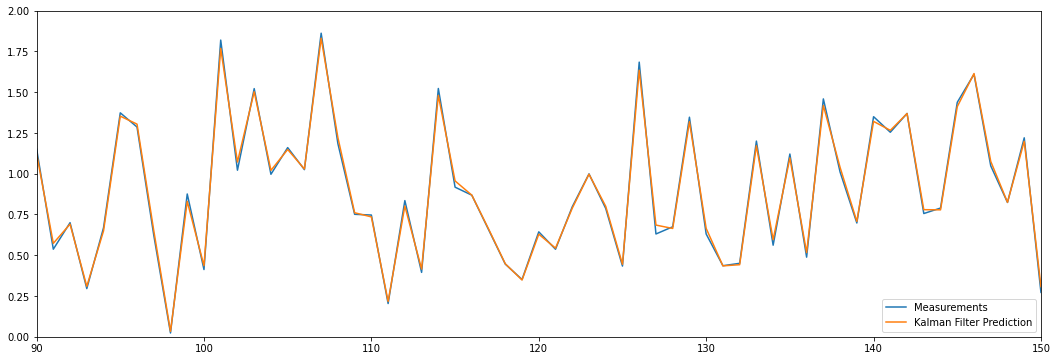

In [55]:
Y = np.genfromtxt('test_data.txt')[:,1]

plt.figure(figsize=(18,6))
# plt.plot(np.arange(len(Y)), np.log(Y))

Q = np.array([[10]]) # measurement covariance matrix
C = np.array([[1,0]]) # observartion matrix
A = np.array([[1,1],[0,1]]) # state transition matrix
R = np.array([[100,0],[0,100]]) # process noise matrix

B = np.zeros((2,1))


# initial guess of state and estimate uncertainty
X_0 = np.hstack([[0],[0]])
P_0 = np.array([[1000,0],[0,1000]])

# define object
kf = KalmanFilter(A=A,B=B,C=C,Q=Q,R=R,x0=X_0,S=P_0)
predictions = []

log_y = np.log(Y)
# time loop
for z in log_y:
    # predictions.append(np.dot(C,  kf.predict())[0])
    # kf.update(z)
    pred,_ = kf.update(z.reshape(-1,1))
    predictions.append(np.matmul(C,pred)[:,0])


# show result
plt.plot(range(len(log_y)), log_y, label = 'Measurements')
plt.plot(range(len(predictions)), np.array(predictions), label = 'Kalman Filter Prediction')
# plt.legend()
legend_without_duplicate_labels(plt)
plt.xlim([90,150])
plt.ylim([0,2])
plt.show()

In [54]:
print(C)
# print(predictions)
print(pred)
print(np.matmul(C,pred)[:,0])

[[1 0]]
[[1.27256376 1.27256376]
 [0.04370677 0.04370677]]
[1.27256376]


In [30]:
A = np.identity(2)
C = np.identity(2)
B = np.zeros((2,1))
# kf = KalmanFilter(A=A,C=C,B=B)

Q = np.array([[10,1],[1,10]]) # measurement covariance matrix
R = np.array([[10,8],[8,10]]) # process noise matrix

kf = KalmanFilter(A=A,B=B,C=C,Q=Q,R=R)

meas = np.array([[50,50],[50,100],[100,100],[100,150],[200,200]])
# print(y.shape)

for y in meas:
    pred,_ = kf.update(y.reshape(-1,1))
    print(pred)
# pred,_ = kf.update(y)
# print(pred)

[[31.66666667]
 [31.66666667]]
[[53.72812003]
 [69.76585588]]
[[83.31740856]
 [93.7114303 ]]
[[101.64375849]
 [126.48311784]]
[[166.4182359 ]
 [182.07051491]]


In [59]:

data_1 = pd.read_csv("icart_and_human_corridor_5.csv",header = None,index_col=None)

#for robot
x1 = data_1.iloc[:, 2].to_numpy()
y1 = data_1.iloc[:, 3].to_numpy()

training_Y = np.vstack((x1,y1)).T
A = np.identity(2) # state transition matrix
B = np.zeros((2,1))
Q = np.array([[1000,100],[100,1000]]) # measurement covariance matrix
C = np.identity(2) # observartion matrix
R = np.array([[10,9],[9,10]]) # process noise matrix

# define object
kf = KalmanFilter(A=A,B=B,C=C,Q=Q,R=R)
predictions = np.zeros((2,0))

for z in training_Y:
    predictions = np.concatenate((predictions,np.matmul(C,  kf.predict())),axis=1)
    kf.update(z.reshape(-1,1))

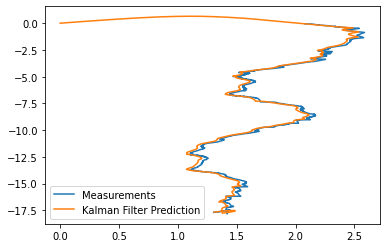

In [60]:
plt.plot(x1, y1, label = 'Measurements')
plt.plot(predictions[0,:],predictions[1,:], label = 'Kalman Filter Prediction')
plt.legend()
plt.show()

In [31]:
print(predictions.shape)

(2, 5087)


In [27]:
print(C)

[[1. 0.]
 [0. 1.]]


In [28]:
print(kf.predict())

[[0.]
 [0.]]


In [29]:
print(np.matmul(C,  kf.predict())[0])

[0.]


In [24]:
# print(predictions.shape)

pred = np.zeros((2,0))

print(pred.shape)

(2, 0)
